In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame
nonrenew = pd.read_csv('clean_data/nonrenewable_energy.csv')
nonrenew

,country,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
0,Canada,4.924317,5.239095,5.480214,5.836056,6.185953,6.624581,6.831992,7.348642,7.857612,...,12.790267,13.354323,13.189590,13.590863,13.728664,13.555908,13.448364,13.617474,13.846043,13.690659
1,Mexico,1.050253,1.111572,1.132470,1.232997,1.353689,1.444834,1.519984,1.680466,1.811085,...,7.222912,7.571642,7.603508,7.626757,7.563910,7.531233,7.614967,7.711194,7.616859,7.375450
2,US,52.300473,55.242418,57.171040,60.643634,63.887342,66.053149,67.426099,70.877600,73.784978,...,90.215943,88.997395,86.362665,88.339194,89.014878,87.900180,87.210132,87.091241,90.098983,88.820249
3,Total North America,58.275043,61.593084,63.783724,67.712687,71.426984,74.122564,75.778076,79.906708,83.453675,...,110.229121,109.923361,107.155763,109.556815,110.307452,108.987321,108.273463,108.419909,111.561886,109.886358
4,Argentina,1.127632,1.165108,1.199725,1.241234,1.283912,1.212287,1.287880,1.310799,1.367420,...,3.186537,3.236700,3.317457,3.454196,3.429151,3.503187,3.494517,3.472192,3.440353,3.323775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Total Asia Pacific,18.602918,20.276199,21.238757,22.889208,26.013779,29.617329,32.439369,34.360105,37.115662,...,194.850335,204.953750,211.174881,217.107857,220.940343,223.779504,227.172042,232.533550,240.065790,246.745800
99,Total World,155.476758,163.864141,170.038973,180.389356,192.587734,204.708413,213.034394,224.585136,237.515569,...,496.324801,507.190181,512.377182,520.547704,523.222440,525.093831,530.544258,537.385046,550.402897,554.922514
100,of which: OECD,109.574113,115.011533,119.557890,127.542597,136.081359,143.559737,147.442299,154.999355,163.640237,...,225.915701,222.477271,219.029291,220.139552,217.369543,216.567934,216.682393,217.515120,220.116760,216.663061
101,Non-OECD,45.902645,48.852609,50.481083,52.846759,56.506375,61.148675,65.592095,69.585781,73.875332,...,270.409100,284.712910,293.347892,300.408152,305.852897,308.525897,313.861865,319.869926,330.286138,338.259454


In [3]:
nonrenew.at[102, "country"] = "EU"
nonrenew.at[99, "country"] = "Global"
nonrenewable_df = nonrenew[nonrenew["country"].isin(["Global", "US", "EU", "India", "China"])]

In [4]:
# Flip the df
nonrenewT = nonrenewable_df.T
nonrenewT = nonrenewT.reset_index(drop=False)
# Rename columns
nonrenewT = nonrenewT.rename(columns={"index":"year", 99: "oil"})
# all_energyT.set_index("year", inplace=True)
nonrenewT

renew_final = nonrenewT.rename(columns={2:'US', 82:'China', 84:'India', 'oil' :'Global', 102:'EU'})

renew_final = renew_final.iloc[1:]

,year,US,China,India,Global,EU
1,1965.0,52.3005,5.51604,2.21766,155.477,42.0641
2,1966.0,55.2424,5.995,2.28538,163.864,43.2428
3,1967.0,57.171,5.39134,2.35591,170.039,44.4663
4,1968.0,60.6436,5.44535,2.51767,180.389,47.3431
5,1969.0,63.8873,6.62766,2.7909,192.588,50.8752


In [22]:
renew_final['year'] = pd.to_numeric(renew_final['year'])
renew_final

,year,US,China,India,Global,EU
1,1965.0,52.3005,5.51604,2.21766,155.477,42.0641
2,1966.0,55.2424,5.995,2.28538,163.864,43.2428
3,1967.0,57.171,5.39134,2.35591,170.039,44.4663
4,1968.0,60.6436,5.44535,2.51767,180.389,47.3431
5,1969.0,63.8873,6.62766,2.7909,192.588,50.8752
6,1970.0,66.0531,8.48661,2.72955,204.708,54.126
7,1971.0,67.4261,10.0617,2.83804,213.034,55.3941
8,1972.0,70.8776,10.8466,2.98799,224.585,58.0508
9,1973.0,73.785,11.4491,3.04928,237.516,61.3008
10,1974.0,71.9169,11.8055,3.23255,238.777,60.2884


### Check trends

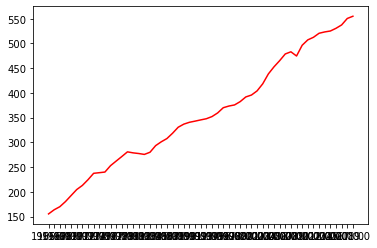

In [6]:
# Check Trends through plots
plt.plot(renew_final.year, renew_final.Global, 'red')

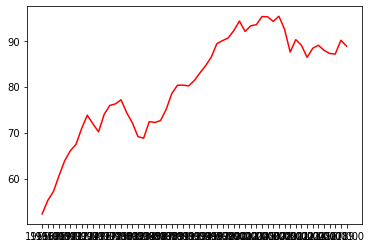

In [7]:
plt.plot(renew_final.year, renew_final.US, 'red')

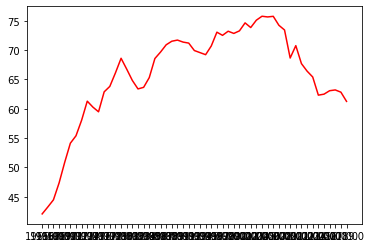

In [8]:
plt.plot(renew_final.year, renew_final.EU, 'red')

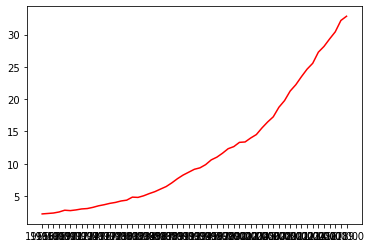

In [9]:
plt.plot(renew_final.year, renew_final.India, 'red')

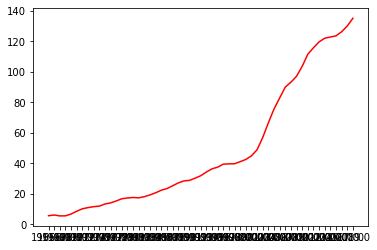

In [10]:
plt.plot(renew_final.year, renew_final.China, 'red')

### Adjustment for US

In [23]:
# Select most recent trend
us_sele = renew_final[renew_final["year"] > 2017]
us_sele

,year,US,China,India,Global,EU
54,2018.0,90.099,129.966,32.198,550.403,62.8372
55,2019.0,88.8202,135.072,32.852,554.923,61.265


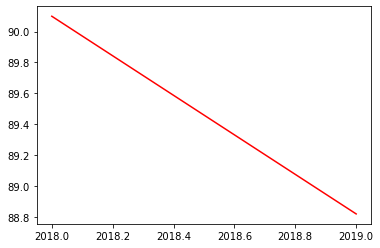

In [24]:
plt.plot(us_sele.year, us_sele.US, 'red')

In [25]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = us_sele.year.values.reshape(-1, 1)
y = us_sele.US.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (2, 1) (2, 1)


In [26]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [27]:
# model.fit(renew_X, ln_Y)
model.fit(X, y)

LinearRegression()

In [28]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[2018.]]
Max X Value: [[2019.]]


In [29]:
# Calculate the y_min and y_max using model.predict and x_min and x_max
# y_min = model.predict(x_min)
# y_max = model.predict(x_max)
y_min = model.predict(x_min)
y_max = model.predict(x_max)

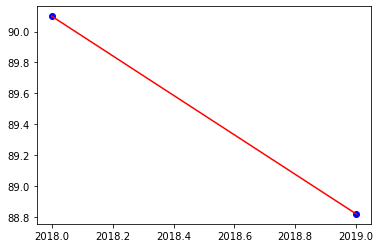

In [30]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [31]:
new_years = [2020, 2030, 2040, 2050]
year_df = pd.DataFrame(new_years, columns = ['year'])
year_df

,year
0,2020
1,2030
2,2040
3,2050


In [32]:
# Predictions
predict_2020 = model.predict([[2020]])
predict_2020 = list(predict_2020[0])
predict_2020 = predict_2020[0]

predict_2030 = model.predict([[2030]])
predict_2030 = list(predict_2030[0])
predict_2030 = predict_2030[0]

predict_2040 = model.predict([[2040]])
predict_2040 = list(predict_2040[0])
predict_2040 = predict_2040[0]

predict_2050 = model.predict([[2050]])
predict_2050 = list(predict_2050[0])
predict_2050 = predict_2050[0]

In [33]:
predict_values = [predict_2020, predict_2030, predict_2040, predict_2050]
data_years = {"year":new_years,
           "US": predict_values}

In [34]:
us_predict_df = pd.DataFrame(data_years, columns=["year", 'US'])
us_predict_df

,year,US
0,2020,87.541515
1,2030,74.754174
2,2040,61.966833
3,2050,49.179492


### Adjustment for EU

In [35]:
# Select most recent trend
eu_sele = renew_final[renew_final["year"] > 2005]
eu_sele

,year,US,China,India,Global,EU
42,2006.0,94.1899,82.7374,17.2647,465.117,75.7772
43,2007.0,95.317,89.8911,18.7441,478.724,74.2484
44,2008.0,92.4931,93.1188,19.7767,483.069,73.4478
45,2009.0,87.5295,96.9986,21.2592,474.575,68.663
46,2010.0,90.2159,103.515,22.2364,496.325,70.7759
47,2011.0,88.9974,111.491,23.4865,507.19,67.7084
48,2012.0,86.3627,115.689,24.6524,512.377,66.4283
49,2013.0,88.3392,119.579,25.5589,520.548,65.4264
50,2014.0,89.0149,121.96,27.2818,523.222,62.329
51,2015.0,87.9002,122.753,28.1735,525.094,62.4949


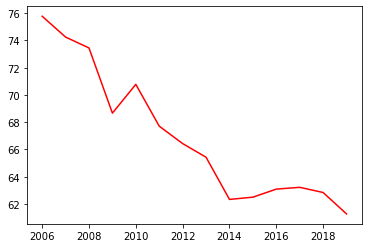

In [36]:
plt.plot(eu_sele.year, eu_sele.EU, 'red')

In [37]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = eu_sele.year.values.reshape(-1, 1)
y = eu_sele.EU.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (14, 1) (14, 1)


In [38]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# model.fit(renew_X, ln_Y)
model.fit(X, y)

LinearRegression()

In [39]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

# Calculate the y_min and y_max using model.predict and x_min and x_max
# y_min = model.predict(x_min)
# y_max = model.predict(x_max)
y_min = model.predict(x_min)
y_max = model.predict(x_max)

Min X Value: [[2006.]]
Max X Value: [[2019.]]


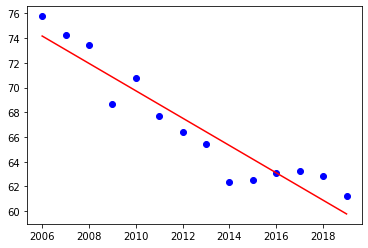

In [40]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [41]:
# Predictions
predict_2020 = model.predict([[2020]])
predict_2020 = list(predict_2020[0])
predict_2020 = predict_2020[0]

predict_2030 = model.predict([[2030]])
predict_2030 = list(predict_2030[0])
predict_2030 = predict_2030[0]

predict_2040 = model.predict([[2040]])
predict_2040 = list(predict_2040[0])
predict_2040 = predict_2040[0]

predict_2050 = model.predict([[2050]])
predict_2050 = list(predict_2050[0])
predict_2050 = predict_2050[0]

In [42]:
predict_values = [predict_2020, predict_2030, predict_2040, predict_2050]
data_years = {"year":new_years,
           "EU": predict_values}

In [43]:
eu_predict_df = pd.DataFrame(data_years, columns=["year", 'EU'])
eu_predict_df

,year,EU
0,2020,58.673859
1,2030,47.600452
2,2040,36.527045
3,2050,25.453638


### Adjustment for India

In [44]:
# Select most recent trend
india_sele = renew_final[renew_final["year"] > 2000]
india_sele

,year,US,China,India,Global,EU
37,2001.0,92.0079,44.809,13.3684,395.698,74.6593
38,2002.0,93.2428,48.8091,13.9856,404.085,73.863
39,2003.0,93.4765,56.8341,14.5145,418.367,75.119
40,2004.0,95.244,66.4879,15.5449,438.361,75.7918
41,2005.0,95.1962,75.5005,16.464,452.705,75.6733
42,2006.0,94.1899,82.7374,17.2647,465.117,75.7772
43,2007.0,95.317,89.8911,18.7441,478.724,74.2484
44,2008.0,92.4931,93.1188,19.7767,483.069,73.4478
45,2009.0,87.5295,96.9986,21.2592,474.575,68.663
46,2010.0,90.2159,103.515,22.2364,496.325,70.7759


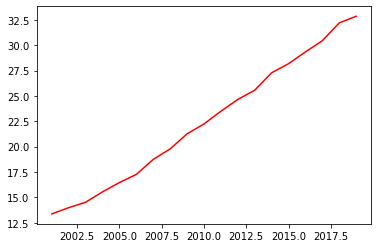

In [45]:
plt.plot(india_sele.year, india_sele.India, 'red')

In [46]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = india_sele.year.values.reshape(-1, 1)
y = india_sele.India.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (19, 1) (19, 1)


In [47]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [48]:
# model.fit(renew_X, ln_Y)
model.fit(X, y)

LinearRegression()

In [49]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[2001.]]
Max X Value: [[2019.]]


In [50]:
# Calculate the y_min and y_max using model.predict and x_min and x_max
# y_min = model.predict(x_min)
# y_max = model.predict(x_max)
y_min = model.predict(x_min)
y_max = model.predict(x_max)

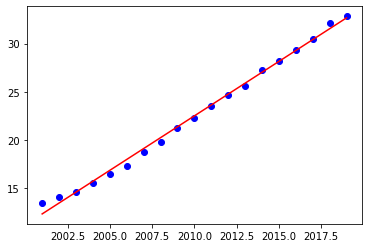

In [51]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [52]:
# Predictions
predict_2020 = model.predict([[2020]])
predict_2020 = list(predict_2020[0])
predict_2020 = predict_2020[0]

predict_2030 = model.predict([[2030]])
predict_2030 = list(predict_2030[0])
predict_2030 = predict_2030[0]

predict_2040 = model.predict([[2040]])
predict_2040 = list(predict_2040[0])
predict_2040 = predict_2040[0]

predict_2050 = model.predict([[2050]])
predict_2050 = list(predict_2050[0])
predict_2050 = predict_2050[0]

In [53]:
predict_values = [predict_2020, predict_2030, predict_2040, predict_2050]
data_years = {"year":new_years,
           "India": predict_values}

In [54]:
india_predict_df = pd.DataFrame(data_years, columns=["year", 'India'])
india_predict_df

,year,India
0,2020,33.819691
1,2030,45.158478
2,2040,56.497264
3,2050,67.836050


### Adjustment for China

In [55]:
# Select most recent trend
china_sele = renew_final[renew_final["year"] > 2000]
china_sele

,year,US,China,India,Global,EU
37,2001.0,92.0079,44.809,13.3684,395.698,74.6593
38,2002.0,93.2428,48.8091,13.9856,404.085,73.863
39,2003.0,93.4765,56.8341,14.5145,418.367,75.119
40,2004.0,95.244,66.4879,15.5449,438.361,75.7918
41,2005.0,95.1962,75.5005,16.464,452.705,75.6733
42,2006.0,94.1899,82.7374,17.2647,465.117,75.7772
43,2007.0,95.317,89.8911,18.7441,478.724,74.2484
44,2008.0,92.4931,93.1188,19.7767,483.069,73.4478
45,2009.0,87.5295,96.9986,21.2592,474.575,68.663
46,2010.0,90.2159,103.515,22.2364,496.325,70.7759


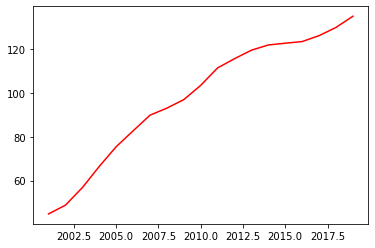

In [56]:
plt.plot(china_sele.year, china_sele.China, 'red')

In [57]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = china_sele.year.values.reshape(-1, 1)
y = china_sele.China.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (19, 1) (19, 1)


In [58]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# model.fit(renew_X, ln_Y)
model.fit(X, y)

LinearRegression()

In [59]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

# Calculate the y_min and y_max using model.predict and x_min and x_max
# y_min = model.predict(x_min)
# y_max = model.predict(x_max)
y_min = model.predict(x_min)
y_max = model.predict(x_max)

Min X Value: [[2001.]]
Max X Value: [[2019.]]


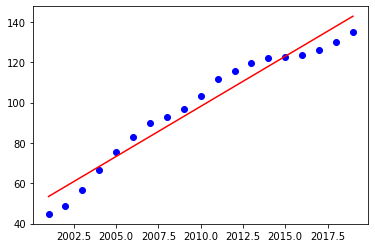

In [60]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [61]:
# Predictions
predict_2020 = model.predict([[2020]])
predict_2020 = list(predict_2020[0])
predict_2020 = predict_2020[0]

predict_2030 = model.predict([[2030]])
predict_2030 = list(predict_2030[0])
predict_2030 = predict_2030[0]

predict_2040 = model.predict([[2040]])
predict_2040 = list(predict_2040[0])
predict_2040 = predict_2040[0]

predict_2050 = model.predict([[2050]])
predict_2050 = list(predict_2050[0])
predict_2050 = predict_2050[0]

In [62]:
predict_values = [predict_2020, predict_2030, predict_2040, predict_2050]
data_years = {"year":new_years,
           "China": predict_values}

In [63]:
china_predict_df = pd.DataFrame(data_years, columns=["year", 'China'])
china_predict_df

,year,China
0,2020,147.826300
1,2030,197.497923
2,2040,247.169546
3,2050,296.841169


In [65]:
# Export the predictions
us_predict_df.to_csv('clean_data/us_unrenewable_adjust_recent.csv', encoding='utf-8')
eu_predict_df.to_csv('clean_data/eu_unrenewable_adjust_recent.csv', encoding='utf-8')
india_predict_df.to_csv('clean_data/india_unrenewable_adjust_recent.csv', encoding='utf-8')
china_predict_df.to_csv('clean_data/china_unrenewableadjust_recent.csv', encoding='utf-8')